Let's say we want to get some fruits, and we come up with two **ideas**:

1. Planting apples and oranges in backyard.
2. Migrating to warmer area.

How to compare them?

Let's describe what we expect to add, and what we expect to get from **plans** based on them, expressed in terms of **steps**:

<u>Plan 1:</u>

1. extracting seeds
2. planting field
3. waiting (for crops to grow)

![planting](http://blog.mindey.com/wp-content/uploads/2014/12/soil-with-plant-sprout-300x200.jpg)

<u>Plan 2:</u>

1. waiting (for right conditions to travel)
2. travel (to where the fruis are)

![traveling](http://blog.mindey.com/wp-content/uploads/2014/12/orange-trees-near-ocean-300x200.jpg)

In order to determine, which plan is better, we have to give some assumptions. So, let's say our first plan is to invest into getting **20** oranges and **30** apples, extract their seeds, plant a field, care for it for **10 years**, and wait for another **1 year** to get the yield of **5000 oranges** and **10000 apples**. And let's say that our second plan is to invest **6 months** of waiting for **right conditions to travel** until, namely, let's say a person has a job, and has to accumulate the amount of money needed to **survive a 30 day trip**, and then actually invest that 30 day trip to travel into the region, where he can get **10000 bananas** and **50000 oranges** free in nature. Also, assume that the market price of all the things mentioned are known in various currencies:

1. apple seeds: 0.15**usd** per item
2. apple trees: 200**eur** per item
3. apples: 500**jpy** per item
4. orange seeds: 0.1**usd** per item
5. orange trees: 150**usd** per item
6. oranges: 1.3**cny** per item
7. bananas: 0.25**usd** per item

Okay, so let's now express it in terms of StepIO/PlanDF language:

In [1]:
import plandf

In [2]:
# extracting seeds ('orange seeds', 200), ('apple seeds': 150)
# planting field
# waiting (for crops to grow)

growing_apples_and_oranges = [

    ('extracting seeds: 1; time: 0.5@1h; oranges: 20@1.3cny; apples: 30@500jpy',   
        'orange seeds: 200; apple seeds: 150@0.15usd'),

    ('planting field: 1; time: 3653.5@24h; day of labor: 1; years of care: 10',
         'orange trees: 50@150usd; apple trees: 100@200eur'),

    ('waiting (for crops to grow): 1; time: 365.25@24h; years of waiting: 1',
         'oranges: 5000@1.3cny; apples: 10000@500jpy')
]

# waiting (for right conditions to travel)
# travel (to where the fruis are)

migrating_to_warmer_latitude = [
    ('time: 6@720h; months of waiting: 6',
         'for right conditions to travel: 1; ability to survive a 30 day travel: 1'),

    ('time: 30@24h; days travelling: 30',
         'bananas: 10000@0.25usd; apples: 0@500jpy; oranges: 50000@1.3cny')
]

In [3]:
import pandas as pd
conversion_rates = pd.DataFrame({'h':   [25.39],
                                 'usd': [1.],
                                 'eur': [1.12565],
                                 'cny': [0.153078],
                                 'rub': [0.012709],
                                 'jpy': [0.008832]})

#conversion_rates = conversion_rates/conversion_rates['h']

In [4]:
planting = plandf.read(growing_apples_and_oranges, conversion_rates)
planting

,worst,mean,best
time,,,
0.0,0.000000,0.000000,0.000000
0.5,-4.488382,-4.488382,-4.488382
87684.5,1177.591177,1177.591177,1177.591177
96450.5,2956.047537,2956.047537,2956.047537


In [5]:
migrating = plandf.read(migrating_to_warmer_latitude, conversion_rates)
migrating

,worst,mean,best
time,,,
0,0.000000,0.000000,0.000000
4320,0.000000,0.000000,0.000000
5040,490.353289,490.353289,490.353289


In [6]:
comparison = pd.concat({'planting': planting,
           'migrating': migrating}, axis=1).interpolate()
comparison

migrating                             planting               \
              worst        mean        best        worst         mean   
time                                                                    
0.0        0.000000    0.000000    0.000000     0.000000     0.000000   
0.5        0.000000    0.000000    0.000000    -4.488382    -4.488382   
4320.0     0.000000    0.000000    0.000000   389.538137   389.538137   
5040.0   490.353289  490.353289  490.353289   783.564657   783.564657   
87684.5  490.353289  490.353289  490.353289  1177.591177  1177.591177   
96450.5  490.353289  490.353289  490.353289  2956.047537  2956.047537   

                      
                best  
time                  
0.0         0.000000  
0.5        -4.488382  
4320.0    389.538137  
5040.0    783.564657  
87684.5  1177.591177  
96450.5  2956.047537

The **time** axis is in hours, as well as **value** is in values of hours.

# Displaying for Humans

In [7]:
plandf.utils.humanize(comparison)

migrating                                  planting  \
                           worst          mean          best         worst   
0 days 00:00:00         0.000000      0.000000      0.000000      0.000000   
0 days 00:30:00         0.000000      0.000000      0.000000   -112.209559   
180 days 00:00:00       0.000000      0.000000      0.000000   9738.453432   
210 days 00:00:00   12258.832217  12258.832217  12258.832217  19589.116422   
3653 days 12:30:00  12258.832217  12258.832217  12258.832217  29439.779413   
4018 days 18:30:00  12258.832217  12258.832217  12258.832217  73901.188432   

                                                
                            mean          best  
0 days 00:00:00         0.000000      0.000000  
0 days 00:30:00      -112.209559   -112.209559  
180 days 00:00:00    9738.453432   9738.453432  
210 days 00:00:00   19589.116422  19589.116422  
3653 days 12:30:00  29439.779413  29439.779413  
4018 days 18:30:00  73901.188432  73901.188432

Populating the interactive namespace from numpy and matplotlib


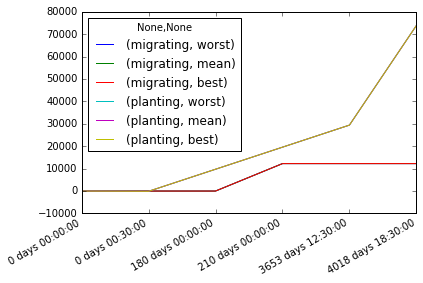

In [8]:
%pylab inline
plandf.utils.humanize(comparison).plot();

This is a very informative table. Conclusion -- you could get more value in fruits by migration. 

# When scenarios differ:

In [9]:
growing_apples_and_oranges = [

    ('extracting seeds: 1; time: 0.5~2@1h; oranges: 15~30@1.3~2cny; apples: 20~40@500~600jpy',   
        'orange seeds: 200~250; apple seeds: 150~200@0.15~0.3usd'),

    ('planting field: 1; time: 2000~3653.5@24h; day of labor: 1~2; years of care: 7~10',
         'orange trees: 50~60@150~200usd; apple trees: 100~150@200~300eur'),

    ('waiting (for crops to grow): 1; time: 365.25~390@24h; years of waiting: 1~1.2',
         'oranges: 5000~6000@1.3~2cny; apples: 10000@500~600jpy')
]

migrating_to_warmer_latitude = [
    ('time: 6@720h; months of waiting: 6',
         'for right conditions to travel: 1; ability to survive a 30 day travel: 1'),

    ('time: 30@24h; days travelling: 30',
         'bananas: 10000@0.25~3usd; apples: 0@500~600jpy; oranges: 50000@1.3~2cny')
]

Note, we didn't have more scenarios, but if we added our uncertainty, such as

In [10]:
plant = plandf.read(growing_apples_and_oranges, conversion_rates)

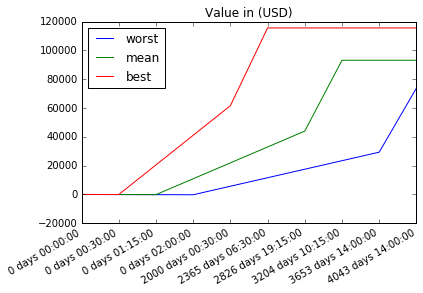

In [11]:
plandf.utils.humanize(plant).plot(title='Value in (USD)')

In [12]:
migrate = plandf.read(migrating_to_warmer_latitude, conversion_rates)

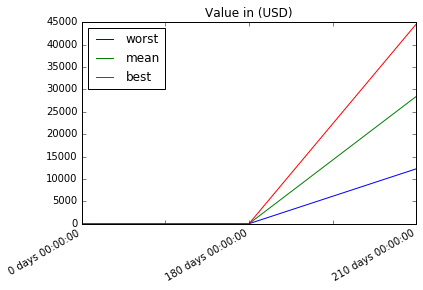

In [13]:
plandf.utils.humanize(migrate).plot(title='Value in (USD)')

In [14]:
compare = pd.concat({'plant': plant,
           'migrate': migrate}, axis=1).interpolate()

In [15]:
compare

migrate                                  plant               \
               worst         mean         best        worst         mean   
time                                                                       
0.00        0.000000     0.000000     0.000000     0.000000     0.000000   
0.50        0.000000     0.000000     0.000000    -2.608017    -2.206302   
1.25        0.000000     0.000000     0.000000    -5.216035    -4.412604   
2.00        0.000000     0.000000     0.000000    -7.824052   436.721331   
4320.00     0.000000     0.000000     0.000000    70.981252   583.765977   
5040.00   490.353289  1137.413746  1784.474202   149.786556   730.810622   
48000.50  490.353289  1137.413746  1784.474202   228.591860   877.855267   
56766.50  490.353289  1137.413746  1784.474202   465.007772  1318.989203   
67843.25  490.353289  1137.413746  1784.474202   701.423683  1760.123138   
76906.25  490.353289  1137.413746  1784.474202   937.839595  3728.031088   
87686.00  490.353289  1137.413746  1784.474202  1174.255507  3728.031088   
97046.00  490.353289  1137.413746  1784.474202  2952.711868  3728.031088   

                       
                 best  
time                   
0.00         0.000000  
0.50        -1.232967  
1.25       821.325127  
2.00      1643.883221  
4320.00   1918.069252  
5040.00   2192.255283  
48000.50  2466.441315  
56766.50  4625.911027  
67843.25  4625.911027  
76906.25  4625.911027  
87686.00  4625.911027  
97046.00  4625.911027

In [16]:
plandf.utils.humanize(compare)

migrate                                     plant  \
                           worst          mean          best         worst   
0 days 00:00:00         0.000000      0.000000      0.000000      0.000000   
0 days 00:30:00         0.000000      0.000000      0.000000    -65.200433   
0 days 01:15:00         0.000000      0.000000      0.000000   -130.400866   
0 days 02:00:00         0.000000      0.000000      0.000000   -195.601300   
180 days 00:00:00       0.000000      0.000000      0.000000   1774.531298   
210 days 00:00:00   12258.832217  28435.343639  44611.855061   3744.663897   
2000 days 00:30:00  12258.832217  28435.343639  44611.855061   5714.796495   
2365 days 06:30:00  12258.832217  28435.343639  44611.855061  11625.194289   
2826 days 19:15:00  12258.832217  28435.343639  44611.855061  17535.592083   
3204 days 10:15:00  12258.832217  28435.343639  44611.855061  23445.989878   
3653 days 14:00:00  12258.832217  28435.343639  44611.855061  29356.387672   
4043 days 14:00:00  12258.832217  28435.343639  44611.855061  73817.796692   

                                                 
                            mean           best  
0 days 00:00:00         0.000000       0.000000  
0 days 00:30:00       -55.157553     -30.824164  
0 days 01:15:00      -110.315105   20533.128179  
0 days 02:00:00     10918.033285   41097.080523  
180 days 00:00:00   14594.149415   47951.731304  
210 days 00:00:00   18270.265545   54806.382085  
2000 days 00:30:00  21946.381675   61661.032866  
2365 days 06:30:00  32974.730065  115647.775678  
2826 days 19:15:00  44003.078455  115647.775678  
3204 days 10:15:00  93200.777205  115647.775678  
3653 days 14:00:00  93200.777205  115647.775678  
4043 days 14:00:00  93200.777205  115647.775678

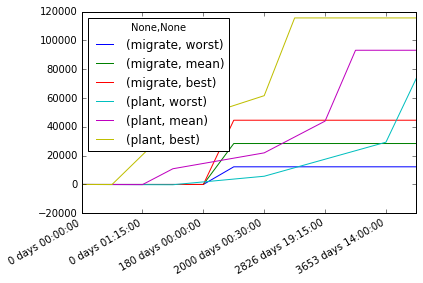

In [17]:
plandf.utils.humanize(compare).plot()